### Data Inspection & Cleaning

In [7]:
import pandas as pd
import seaborn as sns

# Titanik ma'lumotlarini yuklash
df = sns.load_dataset('titanic')

# Birinchi bir nechta qatorni yuklash
print("First 5 rows:")
print(df.head())

# Ma'lumotlarni strukturasini tekshiramiz
print("\nDataset Info:")
df.info()

print("\nDataset Description:")
print(df.describe(include='all'))


print("\nMissing Values:")
print(df.isnull().sum())


df['age'].fillna(df['age'].median(), inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)

duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows Found: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)


df = pd.get_dummies(df, columns=['sex', 'embark_town', 'class', 'who', 'alone'], drop_first=True)

# Display cleaned data
print("\nCleaned Data Sample:")
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

### Summary Statistics & Initial Insights

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Load the Titanic dataset
df = sns.load_dataset('titanic')

#  Basic statistical summary
summary_stats = df.describe()

#  Mean, median, and standard deviation
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
std_values = df.std(numeric_only=True)

#  Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

#  Grouping: Average age of survivors vs. non-survivors
age_by_survival = df.groupby("survived")["age"].mean()

#  Overall survival percentage
survival_rate = df["survived"].mean() * 100

#  Survival rate by gender
survival_by_gender = df.groupby("sex")["survived"].mean() * 100

#  Survival rate by passenger class
survival_by_class = df.groupby("pclass")["survived"].mean() * 100

# Print results
print("\n\ Basic Statistical Summary:\n", summary_stats)
print("\n Mean Values:\n", mean_values)
print("\n Median Values:\n", median_values)
print("\n Standard Deviation:\n", std_values)
print("\n Correlation Matrix:\n", correlation_matrix)
print("\n Average Age by Survival Status:\n", age_by_survival)
print(f"\n Overall Survival Rate: {survival_rate:.2f}%")
print("\n Survival Rate by Gender:\n", survival_by_gender)
print("\n Survival Rate by Passenger Class:\n", survival_by_class)

# Visualizations
plt.figure(figsize=(12, 5))

# Survival rate by gender
plt.subplot(1, 2, 1)
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.ylabel("Percentage (%)")

# Survival rate by class
plt.subplot(1, 2, 2)
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette="viridis")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Percentage (%)")

plt.tight_layout()
plt.show()


### Data Visualization

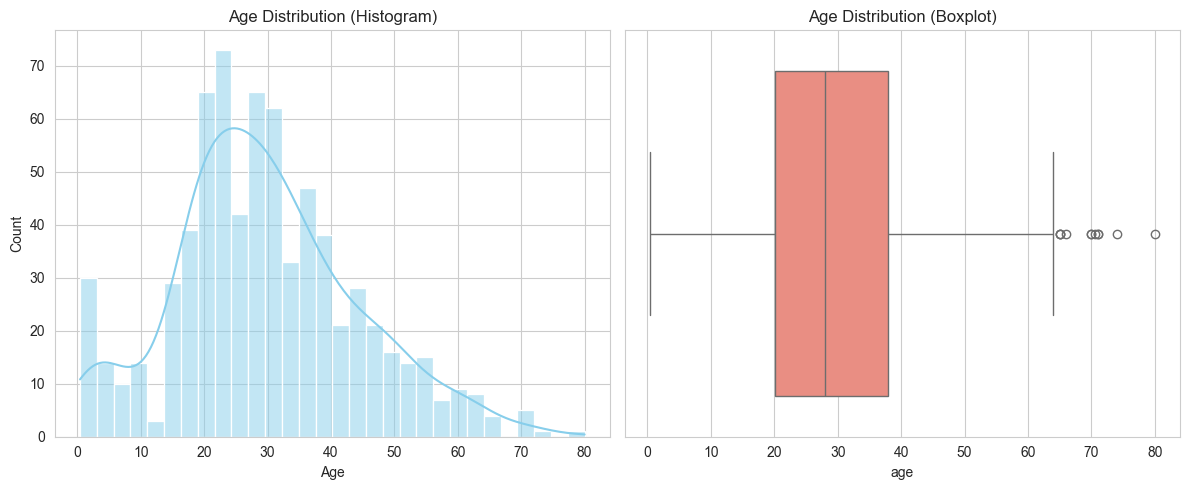

C:\Users\user\AppData\Local\Temp\ipykernel_11664\354463431.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["sex"], y=df["survived"], estimator=lambda x: sum(x) / len(x) * 100, palette="coolwarm")


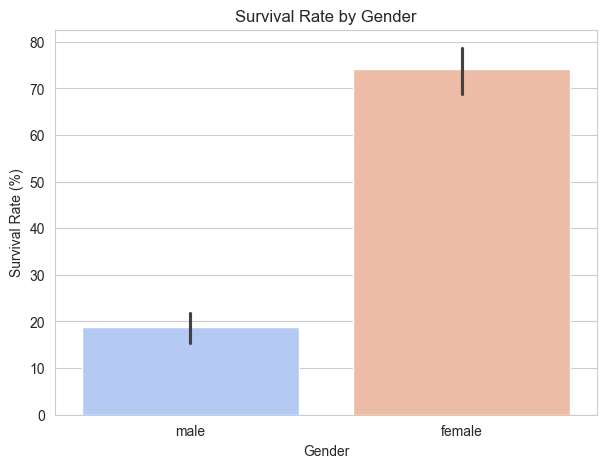

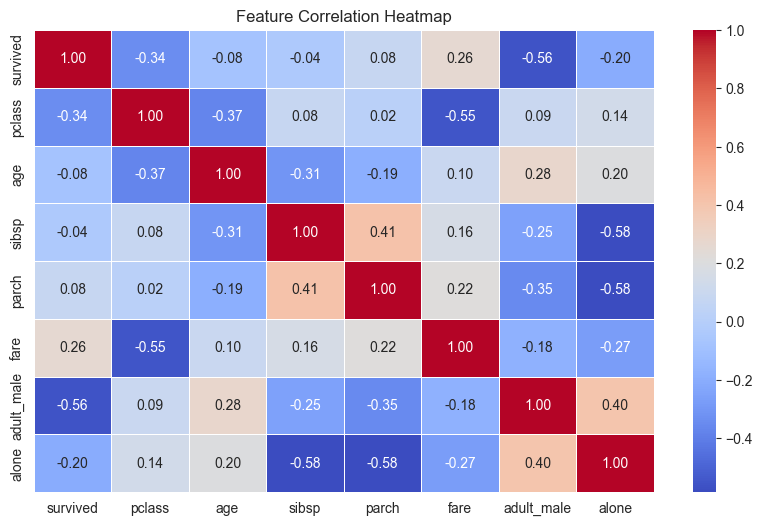

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#  Load Titanic dataset
df = sns.load_dataset('titanic')

#  Set the visual style
sns.set_style("whitegrid")

# ⃣ Histogram & Boxplot: Age Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Age Distribution (Histogram)")
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'], color="salmon")
plt.title("Age Distribution (Boxplot)")

plt.tight_layout()
plt.show()

#  Bar Chart: Survival Rate by Gender
plt.figure(figsize=(7, 5))
sns.barplot(x=df["sex"], y=df["survived"], estimator=lambda x: sum(x) / len(x) * 100, palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Gender")
plt.show()

#  Heatmap: Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
